<a href="https://colab.research.google.com/github/chaiminwoo0223/Recreation/blob/main/Part1_5_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EC%9D%B4_%EA%B7%B8%EB%A6%B0_%EA%B7%B8%EB%A6%BC_Stable_Diffusion_v2_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 고해상도 이미지 생성 Stable Diffusion v2

![](https://i.imgur.com/6aiWqOz.png)

## 참고 영상

https://huggingface.co/stabilityai/stable-diffusion-2


```
@InProceedings{Rombach_2022_CVPR,
    author    = {Rombach, Robin and Blattmann, Andreas and Lorenz, Dominik and Esser, Patrick and Ommer, Bj\"orn},
    title     = {High-Resolution Image Synthesis With Latent Diffusion Models},
    booktitle = {Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition (CVPR)},
    month     = {June},
    year      = {2022},
    pages     = {10684-10695}
}
```

In [ ]:
!nvidia-smi

Wed Apr  5 09:08:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 파이썬 패키지 설치

5분 소요

In [ ]:
!pip install --upgrade -qq git+https://github.com/huggingface/diffusers.git transformers accelerate scipy xformers gradio translate

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 98.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 KB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 KB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 8.

## 모델 다운로드 및 로드

- 60초 소요 (A100-SXM4-40GB)
- 90초 소요 (Tesla T4)

  0%|          | 0/50 [00:00<?, ?it/s]

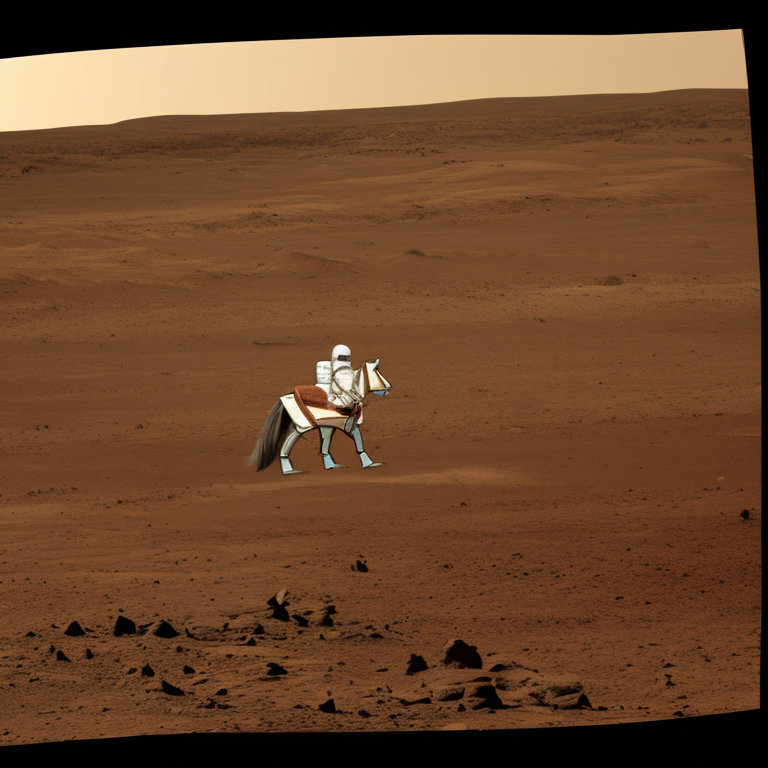

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

model_id = "stabilityai/stable-diffusion-2"

# Use the Euler scheduler here instead
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, revision="fp16", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt, height=768, width=768).images[0]

image.save("astronaut_rides_horse.png")

image

## 영어 번역 및 이미지 생성 함수 정의

- 6초 소요 (A100-SXM4-40GB)
- 28초 소요 (Tesla T4)

커피를 마시는 예쁜 여자의 얼굴
The Face of a Pretty Woman Who Drinks Coffee


  0%|          | 0/50 [00:00<?, ?it/s]

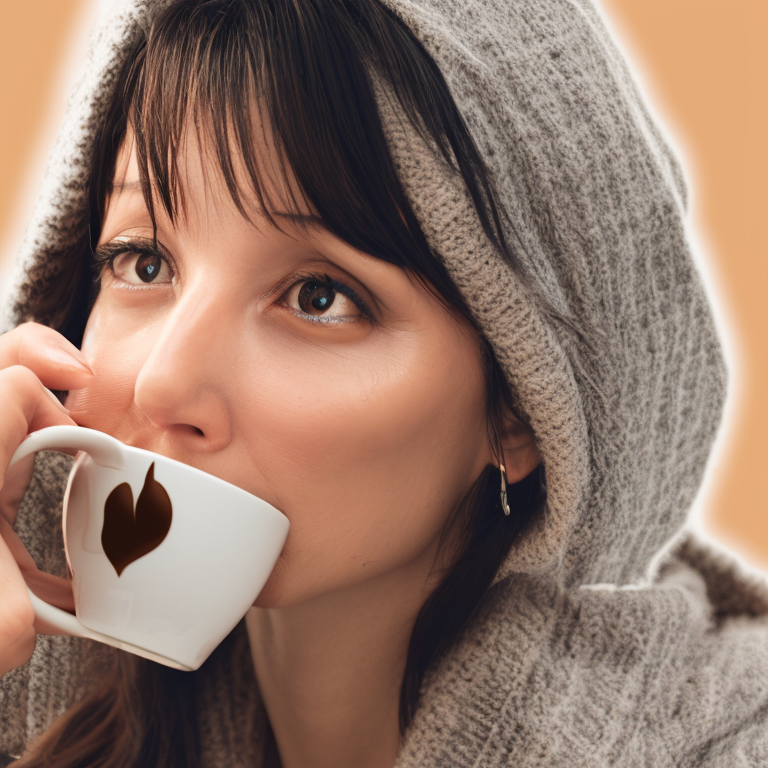

In [ ]:
from translate import Translator

translator = Translator(from_lang="ko", to_lang="en")

def generate_images(text):
    print(text)
    translation = translator.translate(text)
    print(translation)

    image = pipe(translation, height=768, width=768).images[0]

    return image

generate_images("커피를 마시는 예쁜 여자의 얼굴")

In [ ]:
import gradio as gr

def inference(text):
    return generate_images(text)

demo = gr.Interface(fn=inference, inputs="text", outputs="image")

demo.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://77201b54ba51f76fd3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


밥 해주는 예쁜 누나
Pretty girl who eats.


  0%|          | 0/50 [00:00<?, ?it/s]